## CPE 4903 HW - Logistic Regression ##
<div>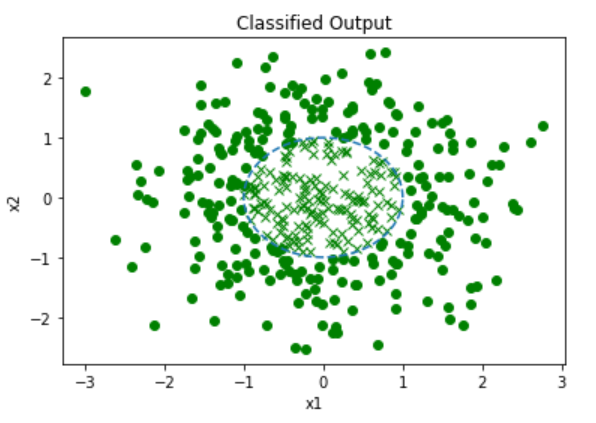<div>

The input data x1, x2, y can be loaded from file: "x1_x2_y_circle2.csv"
Work off this file to implement the back-propagation gradient for this classifier. Split the data so that you train on 80% and test with the remaining 20%. Submit the following:<br>
1. Code (with algorithm derived in class)
2. Plot of converging cost function J and final value (train data)
3. Plots of classification showing 'x's, o's, and decision boundary. Do this for both training and testing data.  
4. Compare the accuracies of training vs testing. Accuracy can be calcuated with this command:
    acc = np.mean(np.rint(A) == Y)*100
    
__Extra credit:__ 15% on separate notebook file using Keras
    
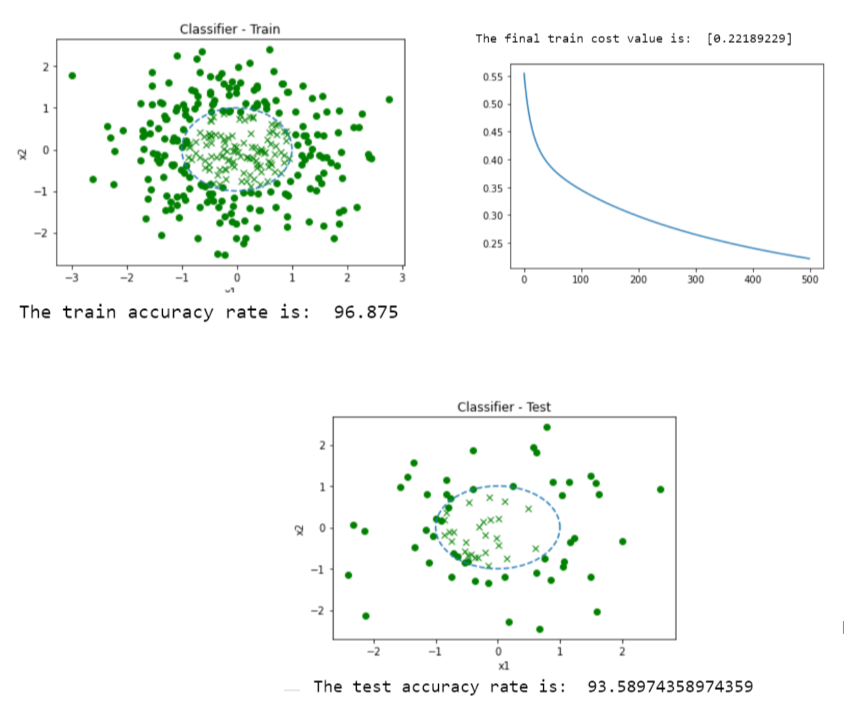


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
def sigmoid(z):
    a = 1 / (1 + np.exp(-z))
    return a

In [4]:
def plot_classification(x1, x2 ,y): #x1, x2,and y are 1xm row vectors
    m = y.shape[1]
    for i in range(m):
        if y[0,i]>.5:
            plt.plot(x1[0,i], x2[0,i], 'gx')
            #plt.legend('Exam 1')
        else:
            plt.plot(x1[0,i], x2[0,i], 'go')
    return

In [5]:
def plot_circle(radius):
    theta = np.linspace(0, 2*np.pi, 100)
    r = np.sqrt(radius)
    x1 = r*np.cos(theta)
    x2 = r*np.sin(theta)
    plt.plot(x1, x2, '--')
    return

### Import data and plot ###

In [6]:
df = pd.read_csv('x1_x2_y_circle2.csv')
df.head()

,Unnamed: 0,x1,x2,y
0,0,-0.947793,-1.217970,0.0
1,1,0.666360,1.895363,0.0
2,2,0.604357,-0.317137,1.0
3,3,-0.009871,-2.123730,0.0
4,4,0.442463,-0.547668,1.0


In [7]:
m_train = 320 # number of data samples
nx = 2 #number of input features
x1 = df['x1'].to_numpy() 
x2 = df['x2'].to_numpy() 
y = df['y'].to_numpy() 

(x1_test, x1_train, x2_test, x2_train, y_test, y_train) = train_test_split(x1, x2, y, test_size=.8, random_state=0)


In [8]:
X = np.block([x1_train, x2_train]).reshape((m_train,nx))   #dimension (m x nx)
X = X.T # (nx x m)

In [9]:
X.shape

(2, 320)

In [10]:
W = np.ones((nx,1))
b = 0

In [11]:
Y = y_train.reshape((1,m_train))
A_train = np.shape((1,m_train))
Z = np.shape((1,m_train))
L = np.shape((1,m_train))

[[-0.28820721 -0.34390651 -0.56183969 -0.49619057 -0.48625269 -0.37748327
  -0.38043011 -0.35629814 -0.14060036 -0.49603845 -0.6901734  -0.35382577
  -0.51566111 -0.35032013 -0.51124589 -0.2973078  -0.42994614 -0.3035396
  -0.23738064 -0.12837783 -0.38218928 -0.3418881  -0.20008592 -0.18415012
  -0.7623226  -0.64237634 -0.25200662 -0.58650522 -0.74723151 -0.48061113
  -0.77838923 -0.53018596 -0.87948123 -0.36862731 -0.31351804 -0.38034543
  -0.54399265 -0.22832706 -0.46739531 -0.6307316  -0.34233399 -0.47372852
  -0.57876683 -0.35881327 -0.32896013 -0.53204107 -0.49366115 -0.71214006
  -0.40097585 -0.74755532 -0.7955024  -0.51529928 -0.48900757 -0.43343736
  -0.44408156 -0.5453875  -0.55362181 -0.31677074 -0.43532989 -0.37852372
  -0.46434172 -0.40225693 -0.68219409 -0.60101027 -0.51665328 -0.55336726
  -0.37457494 -0.31809227 -0.29565746 -0.44628951 -0.38721601 -0.365661
  -0.41728292 -0.31261353 -0.57404054 -0.54951312 -0.21709254 -0.62293258
  -0.3902529  -0.63392319 -0.56622705  0.

[[-0.35485837 -0.33028943 -0.54638545 -0.47593743 -0.48718358 -0.41266494
  -0.31569798 -0.37477848 -0.14743485 -0.5718911  -0.77567365 -0.3000531
  -0.5260817  -0.35205582 -0.49448449 -0.27469491 -0.40542234 -0.26885518
  -0.24985194 -0.15462389 -0.41135327 -0.35554001 -0.29745845 -0.21908617
  -0.73139176 -0.67001472 -0.35169128 -0.56865202 -0.63832789 -0.39973137
  -0.75057044 -0.54613956 -0.92146466 -0.36749567 -0.31508649 -0.43593159
  -0.56340702 -0.24112879 -0.50256262 -0.64110945 -0.26235126 -0.54902224
  -0.57632572 -0.42703162 -0.33117401 -0.57714161 -0.48214367 -0.74054915
  -0.3698975  -0.69994863 -0.85644609 -0.4879406  -0.44716762 -0.4498407
  -0.46497189 -0.5399874  -0.58892005 -0.28961619 -0.40819374 -0.32211654
  -0.50447736 -0.41927155 -0.6937955  -0.58025483 -0.52499138 -0.56845492
  -0.45600132 -0.32375362 -0.20026328 -0.40941647 -0.41180047 -0.36399377
  -0.36735658 -0.35047823 -0.60524515 -0.50229441 -0.21028881 -0.65530032
  -0.4451029  -0.58745231 -0.52945149  0

Text(0, 0.5, 'J (Cost Function)')

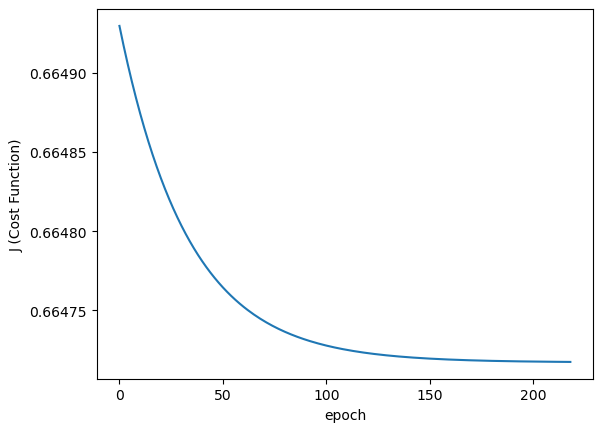

In [14]:
epoch = 230
alpha = .066

J = np.zeros((epoch,1))

for i in range(epoch):
    #Forward Prop
    Z = np.dot(W.T, X) + b
    A_train = sigmoid(Z)
    L = -((Y * np.log(A_train)) + ((1-Y) * np.log(1-A_train)))
    J[i] = (1/m_train) * np.sum(L)
    
    #Backward Prop
    dZ = A_train-Y
    dW = (1/m_train) * np.dot(X,dZ.T)
    db = np.sum(dZ)/m_train
    W = W - (alpha * dW)
    b = b - (alpha* db)

print(J[-1])
plt.plot(J[10:-1])
plt.xlabel('epoch')
plt.ylabel('J (Cost Function)')

The training accuracy is 61.56%


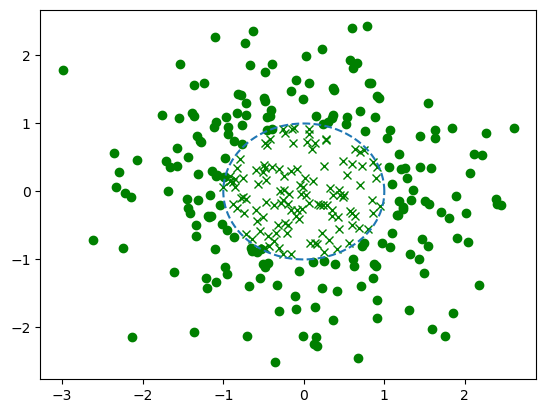

In [12]:
x1_train = x1_train.reshape((1,m_train))
x2_train = x2_train.reshape((1,m_train))
y_train = y_train.reshape((1,m_train))
plot_classification(x1_train, x2_train, y_train)
plot_circle(1)
acc_train = np.mean(np.rint(A_train) == Y)*100
print("The training accuracy is {:.2f}%".format(acc_train))

In [15]:
m_test = 80
Y_test = y_test.reshape((1,m_test))
X_test = np.block([x1_test, x2_test]).reshape((m_test,nx))   #dimension (m x nx)
X_test = X_test.T # (nx x m)
A_train = np.shape((1,m_test))
Z_test = np.shape((1,m_test))

Z_test = np.dot(W.T, X_test) + b
A_test = sigmoid(Z_test)

for i in range(A_test.shape[1]):
    if A_test[0, i] <= 0.5:
        Y_predict_test[0, i] = 0
    else:
        Y_predict_test[0,i]  = 1


NameError: name 'X_test' is not defined

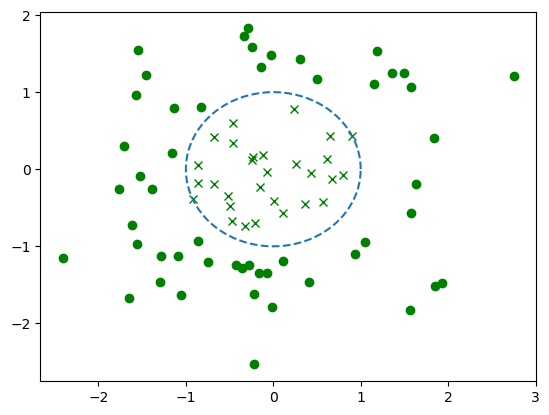

In [14]:
x1_test = x1_test.reshape((1,m_test))
x2_test = x2_test.reshape((1,m_test))
y_test = y_test.reshape((1,m_test))
plot_classification(x1_test, x2_test, y_test)
plot_circle(1)
acc_test = np.mean(np.rint(A_test) == Y_test)*100

In [15]:
print("The testing accuracy is {:.2f}%".format(acc_test))

The testing accuracy is 63.75%
